# 신경망 모델
- 이진 분류: 유방암 예측 사례

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 데이터 준비

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.shape

(569, 31)

### 1. 데이터를 정규/표준화 하지 않은 경우

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)

- 모델 정의

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense       # Fully Connected Network

In [7]:
model = Sequential([
    Dense(100, input_shape=(30,), activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


- 모델 설정(컴파일)

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

- 모델 학습

In [9]:
history = model.fit(X_train, y_train, validation_split=0.2, 
                    epochs=100, batch_size=100)

Epoch 1/100
4/4 [==============================] - 1s 103ms/step - loss: 21.0011 - accuracy: 0.6209 - val_loss: 1.9915 - val_accuracy: 0.1209
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 5.3534 - accuracy: 0.3324 - val_loss: 9.1039 - val_accuracy: 0.3516
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 7.3633 - accuracy: 0.3791 - val_loss: 3.3913 - val_accuracy: 0.3516
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 2.2990 - accuracy: 0.5192 - val_loss: 3.4801 - val_accuracy: 0.6703
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 2.3820 - accuracy: 0.7445 - val_loss: 0.8480 - val_accuracy: 0.6374
Epoch 6/100
4/4 [==============================] - 0s 15ms/step - loss: 1.6571 - accuracy: 0.4835 - val_loss: 0.9121 - val_accuracy: 0.6374
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0054 - accuracy: 0.7912 - val_loss: 1.3689 - val_accuracy: 0.8022
Epoch 8/100
4/4 [=

- 모델 평가

In [10]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.2785 - accuracy: 0.8947


[0.27852025628089905, 0.8947368264198303]

- 훈련과정 시각화: epoch에 따른 accuracy, val_loss의 변화

In [11]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

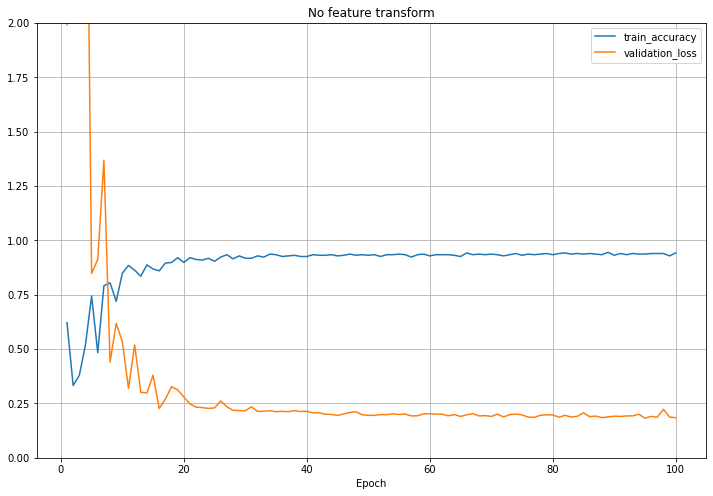

In [12]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train_accuracy')
plt.plot(xs, y_vloss, label='validation_loss')
plt.legend(), plt.grid()
plt.ylim([0,2])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

### 2. 데이터를 정규/표준화한 경우

In [13]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

In [14]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)

- 모델 정의

In [15]:
model2 = Sequential()
model2.add(Dense(100, input_dim=30, activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3100      
                                                                 
 dense_4 (Dense)             (None, 24)                2424      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


In [16]:
# model = Sequential([
#     Dense(100, input_shape=(30,), activation='relu'),
#     Dense(24, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])
# model.summary()

- 모델 설정

In [17]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
hist2 = model2.fit(X_train2, y_train2, validation_split=0.2, 
                    epochs=100, batch_size=100)

Epoch 1/100
4/4 [==============================] - 1s 69ms/step - loss: 0.6218 - accuracy: 0.5082 - val_loss: 0.5589 - val_accuracy: 0.8132
Epoch 2/100
4/4 [==============================] - 0s 17ms/step - loss: 0.4898 - accuracy: 0.8571 - val_loss: 0.4570 - val_accuracy: 0.8462
Epoch 3/100
4/4 [==============================] - 0s 19ms/step - loss: 0.4061 - accuracy: 0.9313 - val_loss: 0.3860 - val_accuracy: 0.9011
Epoch 4/100
4/4 [==============================] - 0s 24ms/step - loss: 0.3412 - accuracy: 0.9368 - val_loss: 0.3322 - val_accuracy: 0.9121
Epoch 5/100
4/4 [==============================] - 0s 20ms/step - loss: 0.2921 - accuracy: 0.9451 - val_loss: 0.2891 - val_accuracy: 0.9341
Epoch 6/100
4/4 [==============================] - 0s 22ms/step - loss: 0.2515 - accuracy: 0.9533 - val_loss: 0.2537 - val_accuracy: 0.9451
Epoch 7/100
4/4 [==============================] - 0s 18ms/step - loss: 0.2178 - accuracy: 0.9560 - val_loss: 0.2248 - val_accuracy: 0.9451
Epoch 8/100
4/4 [===

- 모델 평가

In [22]:
model2.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 3ms/step - loss: 0.0669 - accuracy: 0.9825


[0.06687125563621521, 0.9824561476707458]

- 학습과정 시각화

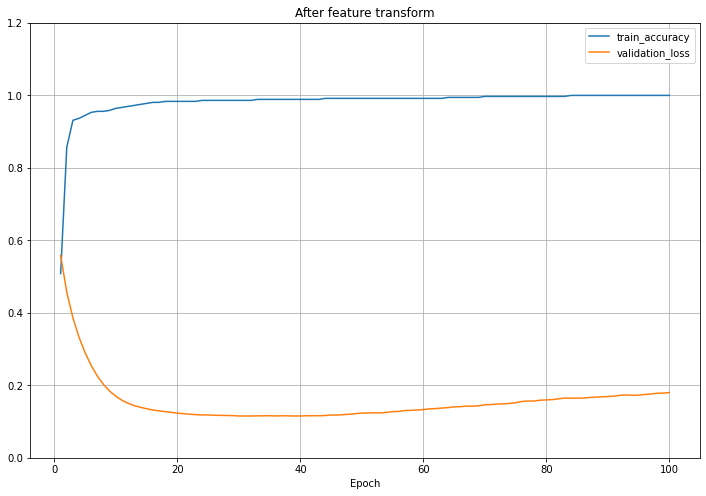

In [24]:
y_acc2 = hist2.history['accuracy']
y_vloss2 = hist2.history['val_loss']
xs2 = np.arange(1, len(y_acc2)+1)

plt.figure(figsize=(12,8))
plt.plot(xs2, y_acc2, label='train_accuracy')
plt.plot(xs2, y_vloss2, label='validation_loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('After feature transform')
plt.show()